In [1]:
import psycopg2
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import os
from torch.utils.data import Dataset, DataLoader, TensorDataset
import tensorflow as tf
from pickle import dump

"""import psycopg2
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
"""
import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense
import os
from torch.utils.data import Dataset, DataLoader,TensorDataset
import tensorflow as tf
from pickle import dump

import tensorflow as tf
from tensorflow.keras import layers
#from keras.layers import Dropout

In [2]:
connection = psycopg2.connect(
    user = "****",
    password = "****",
    host = "localhost",
    port = "5432",
    database = "postgres"
)
cursor = connection.cursor()

**OBTAINING THE DATA FROM THE DATABASE (POSTGRE SQL)**
1) Retrieval of data separately from the database then combine them

   -This method was only used during the training of all models when the program was first created.

2. Retrieval of data from the database in one go.

    -This method was used to ensure that since new inputs will now be made, this new data will be used in the train and test part.

In [3]:
sql3 = "SELECT hb.age, hb.sex, k.cp, k.trestbps, k.chol, k.fbs, k.restecg, k.thalach, k.exang, k.oldpeak, k.slope, k.ca, k.thal FROM hasta_bilgi hb INNER JOIN kalp k ON hb.hasta_id = k.hasta_id;"
column_names = ["age", "sex", "cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope",
                 "ca","thal"]
cursor.execute(sql3)
allData = cursor.fetchall()
allData = pd.DataFrame(allData, columns = column_names) 
sql4 = "SELECT kalp.target FROM KALP;"
cursor.execute(sql4)
target_data = cursor.fetchall()
target_data = pd.DataFrame(target_data, columns = ['target'])


*~Arranging the scale*

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

*~Separation of training and test data*

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(allData,target_data,test_size = 0.30, random_state = 42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns = list(allData.columns))
X_test = pd.DataFrame(X_test, columns = list(allData.columns))


In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
nan_indices = X_train[X_train.isna().any(axis=1)].index
nan_indices

(217, 13)
(93, 13)
(217, 1)
(93, 1)


Index([], dtype='int64')

*~Logistic Regression model*

In [7]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=42)  
classifier.fit(X_train,np.ravel(y_train))

y_pred = classifier.predict(X_test)


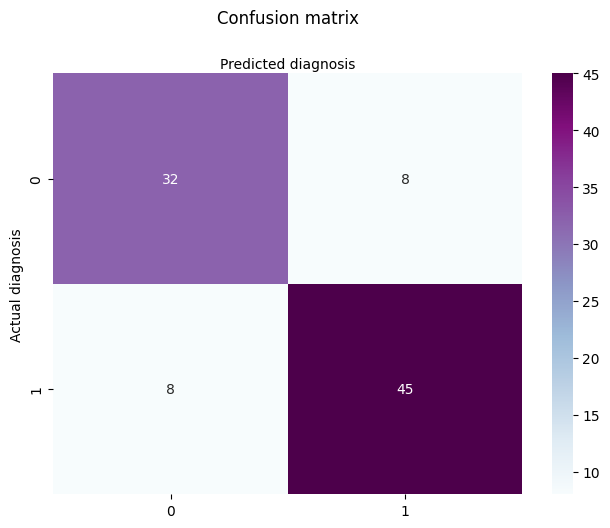

In [8]:
from sklearn import metrics
def conf_matrix(y_test, y_pred):
    matrix = metrics.confusion_matrix(y_test, y_pred)
    
    # Visualizing the Confusion Matrix
    class_names = [0,1] # Our diagnosis categories
    
    fig, ax = plt.subplots()
    # Setting up and visualizing the plot (do not worry about the code below!)
    tick_marks = np.arange(len(class_names)) 
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="BuPu" ,fmt='g') # Creating heatmap
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y = 1.1)
    plt.ylabel('Actual diagnosis')
    plt.xlabel('Predicted diagnosis')

conf_matrix(y_test, y_pred)

In [9]:
def stats(y_test, y_pred):
  print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
  print("Precision: ", metrics.precision_score(y_test, y_pred))
  print("Recall: ", metrics.recall_score(y_test, y_pred))

stats(y_test, y_pred)

Accuracy:  0.8279569892473119
Precision:  0.8490566037735849
Recall:  0.8490566037735849


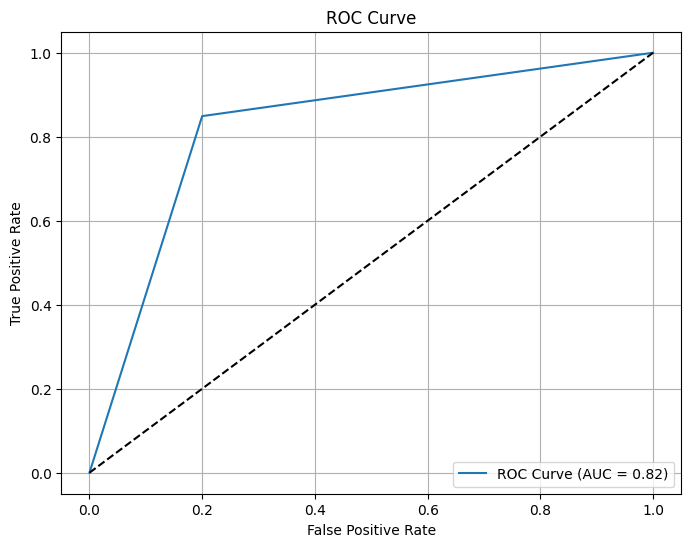

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate fpr, tpr and threshold values for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# AUC score
auc_score = roc_auc_score(y_test, y_pred)

# ROC eğrisini çiz
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # rasgele tahminin ROC eğrisi
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show() 

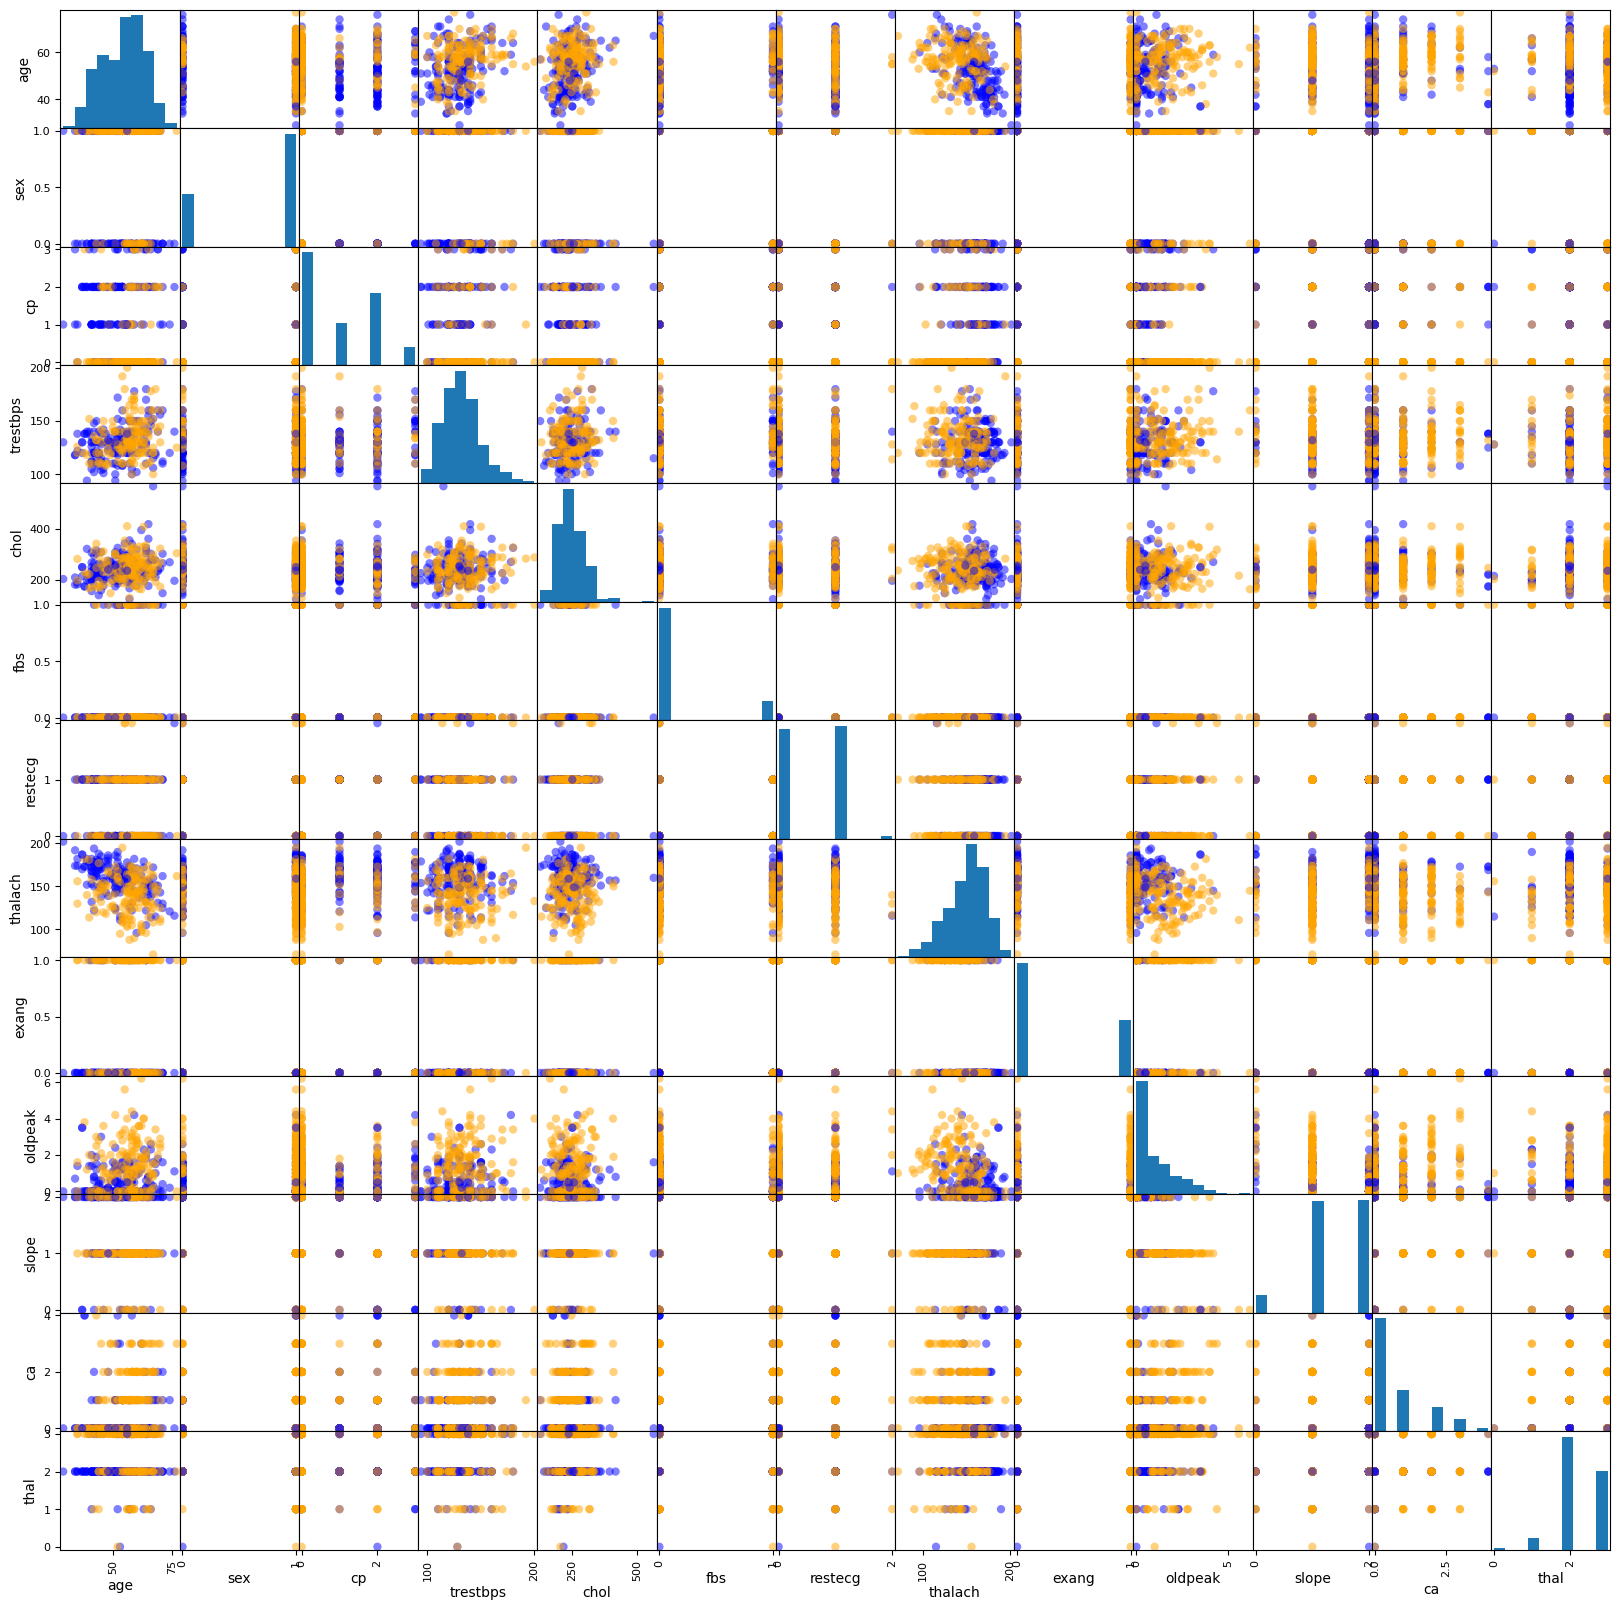

In [11]:
pred_colors = {0:'orange', 1:'blue'}
pd.plotting.scatter_matrix(allData,figsize=(20,20),grid=True,
                           marker='o', c= target_data['target'].map(pred_colors))
plt.show()
 

*~KNN Classifier*

Accuracy:  0.8494623655913979
Precision:  0.819672131147541
Recall:  0.9433962264150944


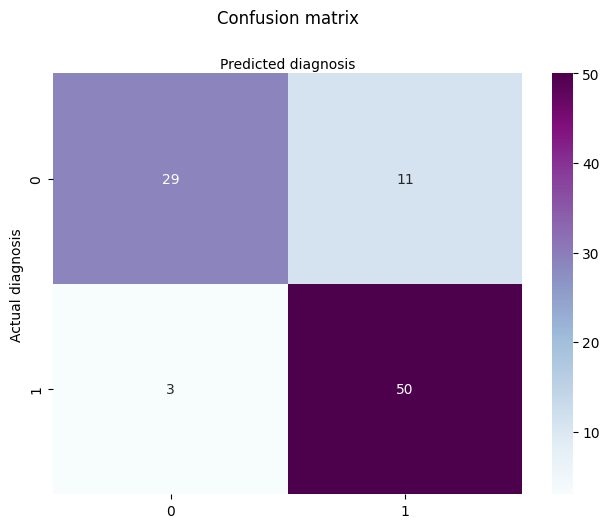

In [12]:
from sklearn.neighbors import KNeighborsClassifier

classifier_2 = KNeighborsClassifier(n_neighbors = 13)
classifier_2.fit(X_train,np.ravel(y_train))
pred_2 = classifier_2.predict(X_test)
conf_matrix(y_test, pred_2)
stats(y_test, pred_2)

*~Random Forest Classifier*

Accuracy: 0.83871
Estimator: 10
Accuracy: 0.83871
Estimator: 12
Accuracy: 0.84946
Estimator: 14
Accuracy: 0.83871
Estimator: 16
Accuracy: 0.84946
Estimator: 18
Accuracy: 0.83871
Estimator: 20
Accuracy: 0.84946
Estimator: 22
Accuracy: 0.86022
Estimator: 24
Accuracy: 0.86022
Estimator: 26
Accuracy: 0.84946
Estimator: 28
Accuracy: 0.86022
Estimator: 30
Accuracy: 0.87097
Estimator: 32
Accuracy: 0.83871
Estimator: 34
Accuracy: 0.86022
Estimator: 36
Accuracy: 0.86022
Estimator: 38
Accuracy: 0.84946
Estimator: 40
Accuracy: 0.82796
Estimator: 42
Accuracy: 0.83871
Estimator: 44
Accuracy: 0.83871
Estimator: 46
Accuracy: 0.83871
Estimator: 48
Accuracy: 0.84946
Estimator: 50
Accuracy: 0.83871
Estimator: 52
Accuracy: 0.83871
Estimator: 54
Accuracy: 0.83871
Estimator: 56
Accuracy: 0.84946
Estimator: 58
Accuracy: 0.86022
Estimator: 60
Accuracy: 0.86022
Estimator: 62
Accuracy: 0.86022
Estimator: 64
Accuracy: 0.86022
Estimator: 66
Accuracy: 0.84946
Estimator: 68
Accuracy: 0.84946
Estimator: 70
Accuracy

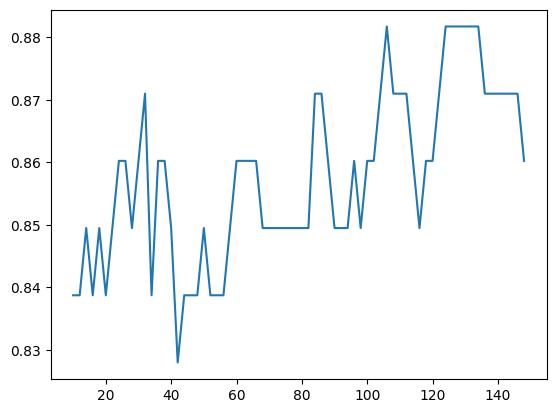

In [13]:
from sklearn.ensemble import RandomForestClassifier
#hangi n_estimator sayısında en çok accuracy alıyorsa onu seçtirt

x = np.arange(10,150,2)
a = []
for i in x:
    rf = RandomForestClassifier(n_estimators = i, random_state =42)
    rf.fit(X_train,np.ravel(y_train))
    y_pred3 = rf.predict(X_test)
    print('Accuracy: {0:0.5f}\nEstimator: {1}'. format(metrics.accuracy_score(y_test, y_pred3), i))
    a.append(metrics.accuracy_score(y_test, y_pred3))
plt.plot(x,a)

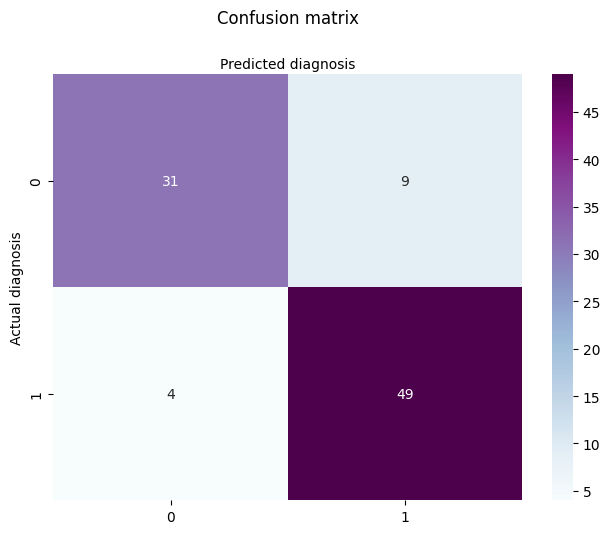

In [14]:
conf_matrix(y_test, y_pred3)

In [15]:
feature_score = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_score

cp          0.134209
thalach     0.121741
oldpeak     0.120240
ca          0.112303
thal        0.091339
age         0.085893
trestbps    0.075870
exang       0.070453
chol        0.067943
slope       0.051318
sex         0.039716
restecg     0.017288
fbs         0.011687
dtype: float64

*~Separation of training and test data for the PyTorch model*

In [16]:
import torch
from torch import nn

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

device = "cuda" if torch.cuda.is_available() else "cpu"

X_train, X_test, y_train, y_test = train_test_split(allData,target_data,test_size = 0.30, random_state = 42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled,columns = allData.columns[0:13])
X_test_scaled = pd.DataFrame(X_test_scaled,columns = allData.columns[0:13])

X_train_scaled.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test_scaled.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

new_columns = allData.columns.tolist()
new_columns.append('target')
new_train_data = pd.concat([X_train_scaled, y_train], axis=1, ignore_index=True).set_axis(labels=new_columns,axis=1)
new_test_data = pd.concat([X_test_scaled, y_test], axis=1, ignore_index=True).set_axis(labels=new_columns,axis=1)
display(new_train_data)
display(new_test_data)

type(new_train_data)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-1.017112,0.682800,1.927627,-1.258161,0.307590,-0.438529,0.925771,-0.771885,-0.719363,0.113496,-0.624091,-0.708355,1.073279,0
1,0.290173,0.682800,-0.937408,-1.258161,1.573021,-0.438529,0.925771,-0.295913,1.390120,1.685541,-0.624091,0.359097,1.073279,0
2,-2.760158,0.682800,0.017604,-0.092401,-0.761789,-0.438529,-1.005886,2.257032,-0.719363,-0.934533,0.988145,-0.708355,-0.532939,1
3,-0.472410,-1.464557,0.972616,-0.675281,-0.494444,-0.438529,0.925771,0.353141,-0.719363,0.462840,-0.624091,-0.708355,-0.532939,1
4,-0.036648,0.682800,-0.937408,0.490479,-0.137984,-0.438529,0.925771,0.439682,-0.719363,0.113496,0.988145,-0.708355,-0.532939,1
5,-0.799231,0.682800,-0.937408,-1.258161,0.503643,-0.438529,-1.005886,-1.377669,1.390120,-0.061175,-0.624091,0.359097,-0.532939,0
6,2.468981,0.682800,-0.937408,-0.383841,1.020509,-0.438529,-1.005886,0.526222,1.390120,-0.934533,0.988145,2.493999,-0.532939,0
7,-0.254529,0.682800,-0.937408,-1.374737,-0.244922,2.280351,0.925771,-0.122832,-0.719363,-0.847198,0.988145,2.493999,1.073279,1
8,-1.126052,0.682800,0.017604,-0.675281,-0.476621,-0.438529,0.925771,0.872384,-0.719363,-0.934533,0.988145,-0.708355,-0.532939,1
9,1.706398,0.682800,0.972616,1.656239,0.396705,-0.438529,0.925771,-1.637290,1.390120,1.598205,-0.624091,0.359097,1.073279,0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.072292,-1.464557,-0.937408,-0.208977,-0.743966,-0.438529,2.857428,-0.858426,1.390120,0.812183,-0.624091,0.359097,1.073279,0
1,0.290173,0.682800,0.972616,1.073359,-1.403416,-0.438529,0.925771,1.045465,-0.719363,0.462840,0.988145,-0.708355,-0.532939,1
2,-1.017112,0.682800,-0.937408,-0.966721,0.236298,-0.438529,-1.005886,1.521438,-0.719363,-0.934533,0.988145,-0.708355,-0.532939,1
3,1.815339,-1.464557,0.972616,-1.258161,0.325413,2.280351,-1.005886,-0.858426,-0.719363,-0.934533,0.988145,0.359097,-0.532939,1
4,1.815339,-1.464557,0.017604,1.656239,0.984863,-0.438529,0.925771,0.526222,-0.719363,-0.585190,0.988145,1.426548,-0.532939,1
5,-1.452873,0.682800,0.017604,0.199039,-0.779611,-0.438529,0.925771,-0.771885,-0.719363,-0.934533,-0.624091,-0.708355,-2.139157,1
6,-0.254529,0.682800,0.972616,0.373903,-0.423152,-0.438529,0.925771,0.829114,-0.719363,-0.934533,0.988145,3.561450,-0.532939,1
7,-0.472410,0.682800,-0.937408,1.073359,-0.066692,-0.438529,-1.005886,-0.944966,-0.719363,1.336198,-0.624091,-0.708355,1.073279,0
8,0.181233,0.682800,-0.937408,0.024175,-1.118248,-0.438529,-1.005886,-1.940182,1.390120,0.899519,-0.624091,0.359097,-2.139157,0
9,-1.126052,0.682800,0.972616,0.490479,-0.209276,-0.438529,-1.005886,1.305086,-0.719363,-0.934533,0.988145,-0.708355,-0.532939,1


pandas.core.frame.DataFrame

In [17]:
X_train_scaled_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_scaled_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

train_dataset = TensorDataset(X_train_scaled_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_scaled_tensor, y_test_tensor)

X_train_scaled_tensor = tf.constant(X_train_scaled.values, dtype = tf.float32)
X_test_scaled_tensor = tf.constant(X_test_scaled.values, dtype = tf.float32)
y_test_tensor = tf.constant(y_test.values, dtype = tf.float32)
y_train_tensor = tf.constant(y_train.values, dtype = tf.float32)       


"""y_test_tensor = tf.convert_to_tensor(y_test_tensor, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train_tensor, dtype=tf.float32)
X_train_scaled_tensor = tf.convert_to_tensor(X_train_scaled_tensor, dtype=tf.float32)
X_test_scaled_tensor = tf.convert_to_tensor(X_test_scaled_tensor, dtype=tf.float32)"""
print(type(X_train_scaled_tensor))
print(tf.shape(X_test_scaled_tensor))

train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=10, shuffle=True)

<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor([93 13], shape=(2,), dtype=int32)


In [18]:
"""X_train = X_train.drop(['ca', 'cp', 'oldpeak', 'thal'], axis=1)
X_test = X_test.drop(['ca', 'cp', 'oldpeak', 'thal'], axis=1)
"""
X_train_t = torch.from_numpy(X_train_scaled.values).type(torch.float)
X_test_t = torch.from_numpy(X_test_scaled.values).type(torch.float)
y_train_t = torch.from_numpy(y_train.values).type(torch.float)
y_test_t = torch.from_numpy(y_test.values).type(torch.float)

"""print(type(new_train_data))
new_train_data = torch.tensor(new_train_data.values)
new_test_data = torch.tensor(new_test_data.values)
print(type(new_train_data))
display(new_train_data)"""


"""for data, labels in train_loader:
    print(data)
    print(labels)"""

for data,labels in train_loader:
    print(data)
    print(labels.squeeze())

tensor([[-1.3439,  0.6828,  0.9726, -0.6753, -0.1202,  2.2804,  0.9258,  1.9109,
         -0.7194, -0.2358, -2.2363, -0.7084,  1.0733],
        [ 0.0723, -1.4646,  0.0176,  0.0242,  1.6978, -0.4385,  0.9258,  0.6993,
         -0.7194,  0.1135,  0.9881, -0.7084, -0.5329],
        [ 0.5081,  0.6828,  0.9726,  1.0734, -0.6192,  2.2804,  0.9258,  0.3099,
         -0.7194,  0.4628,  0.9881, -0.7084, -0.5329],
        [ 0.3991,  0.6828, -0.9374, -1.8410, -0.2271, -0.4385,  0.9258,  0.2666,
         -0.7194, -0.8472,  0.9881,  0.3591,  1.0733],
        [-0.3635, -1.4646,  0.9726, -0.0924,  0.1650, -0.4385, -1.0059, -0.0363,
         -0.7194, -0.4979,  0.9881, -0.7084, -0.5329],
        [ 1.2706,  0.6828, -0.9374, -0.6753,  0.9849, -0.4385, -1.0059,  0.0502,
         -0.7194, -0.5852, -0.6241, -0.7084, -0.5329],
        [ 1.0528,  0.6828,  1.9276,  2.2391, -0.3519, -0.4385, -1.0059,  0.2233,
         -0.7194, -0.4105, -0.6241, -0.7084,  1.0733],
        [-0.9082,  0.6828, -0.9374, -0.6753,  0.

*~PyTorch deep learning model (update will be done)*

In [19]:
"""def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

torch.manual_seed(42)

test_accr = []
train_accr = []

test_loss_val = []
train_loss_val = []
class Model0(nn.Module):
    def __init__(self):
        super(Model0, self).__init__()
        self.layer_1 = nn.Linear(in_features=13, out_features=64)
        self.layer_2 = nn.Linear(in_features=64, out_features=32)
        self.layer_3 = nn.Linear(in_features=32, out_features=1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout2 = nn.Dropout(0.1)
        self.dropout1 = nn.Dropout(0.1)
            
    def forward(self, x):
        x = self.relu(self.layer_1(x))
        x = self.dropout1(x)
        x = self.relu(self.layer_2(x))
        x = self.dropout2(x)
        x = self.sigmoid(self.layer_3(x))
        return x

        
model_0 = Model0().to(device)
"""
"""class ClassificationModel(torch.nn.Module):

    def __init__(self, NUM_FEATURES, NUM_CLASSES, HIDDEN):
        super(ClassificationModel, self).__init__()

        self.linear1 = torch.nn.Linear(NUM_FEATURES, HIDDEN)
        #self.activation = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(HIDDEN, NUM_CLASSES)
        self.log_softmax= nn.LogSoftmax(dim = 1) #nn.Softmax(dim = 1)#
        #self.softmax = torch.nn.Softmax()

    def forward(self, x):
        x = self.linear1(x)
        x = torch.tanh(x)
        x = self.linear2(x)
        #x = self.softmax(x)
        x = self.log_softmax(x)
        return x"""
"""
#mymodel= ClassificationModel(NUM_FEATURES = 13, NUM_CLASSES = 2, HIDDEN = 10)
loss_f = nn.BCELoss()
optimizer = torch.optim.Adam(params= model_0.parameters(), lr=0.001)      
        
epochs = np.arange(1, 301,1)
        
X_train_t, y_train_t = X_train_t.to(device), y_train_t.to(device)
X_test_t, y_test_t = X_test_t.to(device), y_test_t.to(device)
X_test_scaled_tensor, y_test_tensor = X_test_scaled_tensor.to(device), y_test_tensor.to(device)


w = []
#history = model_0.fit(X_train_t, y_train_t, validation_data=(X_test_t, y_test_t), epochs=300, batch_size=10)

for epoch in epochs:
    model_0.train()
    for data, labels in train_loader:
        data, labels = data.to(device), labels.to(device)
        #X_batch = X_train_t[start:start+30]
        #y_batch = y_train_t[start:start+30]
        y_train_p= model_0(data)
        y_train_pred = torch.round(y_train_p)
        
        loss = loss_f(y_train_p, labels)
        #print(y_train_pred)
        #print(labels.squeeze())
        acc =  accuracy_fn(y_true=labels, y_pred=y_train_pred) 
        train_accr.append(acc)
        optimizer.zero_grad()
        loss.backward()
        train_loss_val.append(loss.detach().numpy())
        optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}%")
        
    model_0.eval()  
    with torch.no_grad():
        for data, labels in test_loader:
            data, labels = data.to(device), labels.to(device)
            X_test_sq = model_0(data)
            X_test_sq_pred = torch.round(X_test_sq)
            test_loss = loss_f(X_test_sq,labels)
            test_loss_val.append(test_loss)
            test_acc = accuracy_fn(y_true=labels,
                                               y_pred=X_test_sq_pred)
            test_accr.append(test_acc)
            w.append(test_acc)
            if epoch % 10 == 0:
                print(f"Epoch: {epoch} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

"""

"""
for epoch in epochs:
    optimizer.zero_grad()
    #model_0.train()
    y_train_sq = model_0(X_train_t)
    y_pred = torch.round(y_train_sq)
                    
    loss = loss_f(y_train_sq, y_train_t)
                        
    acc =  accuracy_fn(y_true=y_train_t, y_pred=y_pred) 
    train_accr.append(acc)
    
    loss.backward()
    train_loss_val.append(loss.detach().numpy())
    optimizer.step()
    model_0.eval()
    with torch.no_grad():
            # 1. Forward pass
            X_test_sq = model_0(X_test_t)
            X_test_sq_pred = torch.round(torch.sigmoid(X_test_sq))
            # 2. Caculate loss/accuracy
            test_loss = loss_f(X_test_sq,
                                        y_test_t)
            test_loss_val.append(test_loss)
            test_acc = accuracy_fn(y_true=y_test_t,
                                           y_pred=X_test_sq_pred)
            test_accr.append(test_acc)
            w.append(test_acc)
            if epoch % 10 == 0:
                print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")



print("*******************************")
print(f"Overall Accuracy: {max(test_accr)}")
"""


'\nfor epoch in epochs:\n    optimizer.zero_grad()\n    #model_0.train()\n    y_train_sq = model_0(X_train_t)\n    y_pred = torch.round(y_train_sq)\n                    \n    loss = loss_f(y_train_sq, y_train_t)\n                        \n    acc =  accuracy_fn(y_true=y_train_t, y_pred=y_pred) \n    train_accr.append(acc)\n    \n    loss.backward()\n    train_loss_val.append(loss.detach().numpy())\n    optimizer.step()\n    model_0.eval()\n    with torch.no_grad():\n            # 1. Forward pass\n            X_test_sq = model_0(X_test_t)\n            X_test_sq_pred = torch.round(torch.sigmoid(X_test_sq))\n            # 2. Caculate loss/accuracy\n            test_loss = loss_f(X_test_sq,\n                                        y_test_t)\n            test_loss_val.append(test_loss)\n            test_acc = accuracy_fn(y_true=y_test_t,\n                                           y_pred=X_test_sq_pred)\n            test_accr.append(test_acc)\n            w.append(test_acc)\n            if 

In [20]:
"""plt.figure(figsize=(8, 6))
x = np.arange(0,3000,1)

plt.plot(x, test_accr, 'b', label=f'Test Accuracy')
plt.plot(x,train_accr, 'g', label=f'Train Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(loc='lower right')
plt.grid(True)
plt.show() """

"plt.figure(figsize=(8, 6))\nx = np.arange(0,3000,1)\n\nplt.plot(x, test_accr, 'b', label=f'Test Accuracy')\nplt.plot(x,train_accr, 'g', label=f'Train Accuracy')\n\nplt.xlabel('Epoch')\nplt.ylabel('Accuracy')\n\nplt.legend(loc='lower right')\nplt.grid(True)\nplt.show() "

In [21]:
"""plt.figure(figsize=(8, 6))
plt.plot(x, test_loss_val, 'r', label=f'Test Loss')
plt.plot(x, train_loss_val, 'b', label=f'Train Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend(loc='lower right')
plt.grid(True)
plt.show() """

"plt.figure(figsize=(8, 6))\nplt.plot(x, test_loss_val, 'r', label=f'Test Loss')\nplt.plot(x, train_loss_val, 'b', label=f'Train Loss')\n\nplt.xlabel('Epoch')\nplt.ylabel('Loss')\n\nplt.legend(loc='lower right')\nplt.grid(True)\nplt.show() "

In [22]:
 """model_0.train()
        y_train_sq = model_0(X_train_t)
        y_pred = torch.round(torch.sigmoid(y_train_sq))
                
        loss = loss_f(y_train_sq,
                                  y_train_t)
            
        acc =  accuracy_fn(y_true=y_train_t, 
                                      y_pred=y_pred) 
        train_accr.append(acc)
        optimizer.zero_grad()
        loss.backward()
        train_loss_val.append(loss.detach().numpy())
        optimizer.step()
    model_0.eval()
    
    
    for epoch in epochs:
    for X_batch , y_batch in train_loader:
    #X_batch = X_train_t[start:start+30]
    #y_batch = y_train_t[start:start+30]
        model_0.train()
        y_train_sq = model_0(X_train_t)
        y_pred = torch.round(torch.sigmoid(y_train_sq))
                
        loss = loss_f(y_train_sq,
                                  y_train_t)
            
        acc =  accuracy_fn(y_true=y_train_t, 
                                      y_pred=y_pred) 
        train_accr.append(acc)
        optimizer.zero_grad()
        loss.backward()
        train_loss_val.append(loss.detach().numpy())
        optimizer.step()
    model_0.eval()
    
    """


'model_0.train()\n       y_train_sq = model_0(X_train_t)\n       y_pred = torch.round(torch.sigmoid(y_train_sq))\n               \n       loss = loss_f(y_train_sq,\n                                 y_train_t)\n           \n       acc =  accuracy_fn(y_true=y_train_t, \n                                     y_pred=y_pred) \n       train_accr.append(acc)\n       optimizer.zero_grad()\n       loss.backward()\n       train_loss_val.append(loss.detach().numpy())\n       optimizer.step()\n   model_0.eval()\n   \n   \n   for epoch in epochs:\n   for X_batch , y_batch in train_loader:\n   #X_batch = X_train_t[start:start+30]\n   #y_batch = y_train_t[start:start+30]\n       model_0.train()\n       y_train_sq = model_0(X_train_t)\n       y_pred = torch.round(torch.sigmoid(y_train_sq))\n               \n       loss = loss_f(y_train_sq,\n                                 y_train_t)\n           \n       acc =  accuracy_fn(y_true=y_train_t, \n                                     y_pred=y_pred) \n      

*~Keras deep learning model*

In [23]:
model_2 = tf.keras.Sequential([
    layers.Dense(8, input_shape=(13,), activation='relu', kernel_initializer='normal', name='layer1'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='relu', kernel_initializer='normal', name='layer2'),
    layers.Dropout(0.25),
    layers.Dense(2, activation='relu', kernel_initializer='normal', name='layer3'),
    layers.Dense(1, activation='sigmoid', kernel_initializer='normal', name='layer4')
])

C:\Users\onlinekullanici\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*~Set a path to save the model*

In [24]:
checkpoint_dir = "training_1"
checkpoint_file = "cp.weights.h5"
path_checkpoint = os.path.join(checkpoint_dir, checkpoint_file)
directory_checkpoint = os.path.dirname(path_checkpoint)
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

tf.random.set_seed(42)
callback = tf.keras.callbacks.ModelCheckpoint(filepath=path_checkpoint,
                                               save_weights_only=True,
                                               verbose=1)


model_2.compile(
    loss = keras.losses.BinaryCrossentropy(from_logits=False),
    optimizer = keras.optimizers.Adam(learning_rate=0.0002),
    metrics = ['accuracy'] 
)
#X_train_scaled_tensor.shape,y_train_tensor.shape



history = model_2.fit(X_train_scaled_tensor, y_train_tensor, batch_size=16, epochs=500, validation_data=(X_test_scaled_tensor, y_test_tensor))

Epoch 1/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5190 - loss: 0.6931 - val_accuracy: 0.5699 - val_loss: 0.6931
Epoch 2/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5328 - loss: 0.6931 - val_accuracy: 0.5699 - val_loss: 0.6930
Epoch 3/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5328 - loss: 0.6931 - val_accuracy: 0.5699 - val_loss: 0.6929
Epoch 4/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5328 - loss: 0.6930 - val_accuracy: 0.5699 - val_loss: 0.6929
Epoch 5/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5328 - loss: 0.6930 - val_accuracy: 0.5699 - val_loss: 0.6928
Epoch 6/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5328 - loss: 0.6930 - val_accuracy: 0.5699 - val_loss: 0.6928
Epoch 7/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5328 - loss: 0.6929 - val_accuracy: 0.5699 - val_loss: 0.6927
Epoch 8/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5328 - loss: 0.6929 - val_accuracy: 0.5699 - 

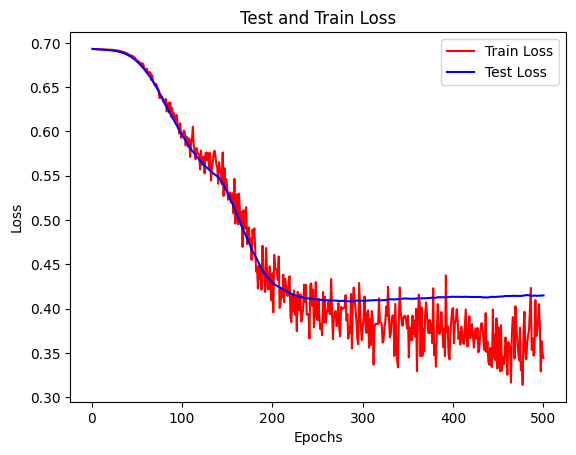

In [25]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'b', label='Test Loss')
plt.title('Test and Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

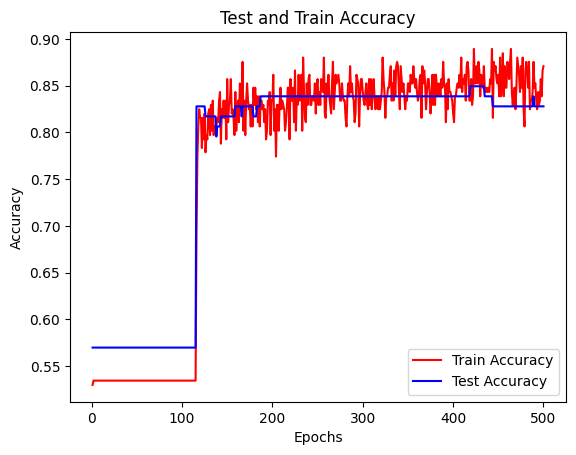

In [26]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'r', label='Train Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Test Accuracy')
plt.title('Test and Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
print(path_checkpoint)


training_1\cp.weights.h5


In [28]:
ls {directory_checkpoint}

 Volume in drive C has no label.
 Volume Serial Number is DA15-A027

 Directory of C:\Users\onlinekullanici\Desktop\jupyters\training_1

05.03.2024  17:16    <DIR>          .
05.03.2024  17:16    <DIR>          ..
               0 File(s)              0 bytes
               2 Dir(s)  244.615.753.728 bytes free


In [29]:
model_2.save('ANN_model_2.h5', include_optimizer=True)
model_2.save_weights('ANN_model_2.weights.h5')
 

In [30]:
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                       │ (None, 8)                   │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer2 (Dense)                       │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer3 (Dense)                       │ (None, 2)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer4 (Dense)                       │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 485 (1.90 KB)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 324 (1.27 KB)

In [31]:
from tensorflow.python import keras
print(tf.__version__)

2.16.1


In [32]:
import keras
print(keras.__version__)

3.0.5


In [33]:
joblib.dump(scaler, 'scale.pkl')

['scale.pkl']

In [34]:
"""symbolic_weights = getattr(model_2.optimizer, 'weights')
weight_values = K.batch_get_value(symbolic_weights)
with open('optimizer.pkl', 'wb') as f:
    pickle.dump(weight_values, f)"""

"symbolic_weights = getattr(model_2.optimizer, 'weights')\nweight_values = K.batch_get_value(symbolic_weights)\nwith open('optimizer.pkl', 'wb') as f:\n    pickle.dump(weight_values, f)"

In [36]:
print("Evaluate model against trained data")
score = model_2.evaluate(X_train_scaled_tensor, y_train_tensor, verbose=0)
print("score %s: %.2f%%" % (model_2.metrics_names[1], score[1]*100))

print("Evaluate model against new data")
score = model_2.evaluate(X_test_scaled_tensor, y_test_tensor, verbose=0)
print("score %s: %.2f%%" % (model_2.metrics_names[1], score[1]*100))

Evaluate model against trained data
score compile_metrics: 90.32%
Evaluate model against new data
score compile_metrics: 82.80%


In [37]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred_class = model_2.predict(X_test_scaled_tensor)
threshold = 0.5
y_pred_classes = (y_pred > threshold).astype(int)
# prediction return proability percentage
y_pred_prob = model_2.predict(X_test_scaled_tensor)

print ("#  original | predicted  | probability  ")
for idx, label in enumerate(y_test_tensor):
    print ("%s     | %s  | %s |   %.2f%%" % (str(idx), str(label), str(y_pred_class[idx]), float(y_pred_prob[idx])*100))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step
#  original | predicted  | probability  
0     | tf.Tensor([0.], shape=(1,), dtype=float32)  | [0.08791105] |   8.79%
1     | tf.Tensor([1.], shape=(1,), dtype=float32)  | [0.8977609] |   89.78%
2     | tf.Tensor([1.], shape=(1,), dtype=float32)  | [0.9188671] |   91.89%
3     | tf.Tensor([1.], shape=(1,), dtype=float32)  | [0.9386643] |   93.87%
4     | tf.Tensor([1.], shape=(1,), dtype=float32)  | [0.8258056] |   82.58%
5     | tf.Tensor([1.], shape=(1,), dtype=float32)  | [0.8553761] |   85.54%
6     | tf.Tensor([1.], shape=(1,), dtype=float32)  | [0.33755508] |   33.76%
7     | tf.Tensor([0.], shape=(1,), dtype=float32)  | [0.08382087] |   8.38%
8     | tf.Tensor([0.], shape=(1,), dtype=float32)  | [0.05289838] |   5.29%
9     | tf.Tensor([1.], shape=(1,), dtype=float32)  | [0.9465478] |   94.65%
10     | tf.Tensor([1.], shape=(1,), dtype=float32)  | [0.96289486] |   96.29%
11     | tf.Tensor([1.], shape=(

C:\Users\onlinekullanici\AppData\Local\Temp\ipykernel_38564\132739631.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ("%s     | %s  | %s |   %.2f%%" % (str(idx), str(label), str(y_pred_class[idx]), float(y_pred_prob[idx])*100))


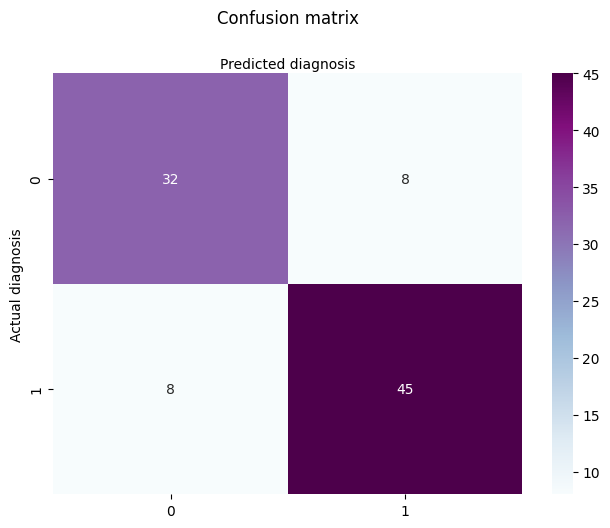

In [38]:
conf_matrix(y_test_tensor,y_pred_classes)